In [2]:
import numpy as np
import pandas as pd
import os 
import math
import matplotlib.pyplot as plt

In [3]:
pwd

'C:\\Users\\TimeUser'

In [4]:
PATH = r"C:\Users\TimeUser\Desktop\contest"
os.listdir(PATH)

['fianl_first_try.png',
 'RF_wholeDS.png',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [5]:
%%time
train_df = pd.read_csv(r"C:\Users\TimeUser\Desktop\contest\train.csv")
test_df = pd.read_csv(r"C:\Users\TimeUser\Desktop\contest\test.csv")

Wall time: 60 s


In [1]:
train_df.shape, test_df.shape

NameError: name 'train_df' is not defined

In [7]:
train_df.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [8]:
test_df.head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,...,-2.1115,7.1178,-0.4249,8.8781,14.9438,-2.2151,-6.0233,9.8117,17.1127,10.8240
6,test_6,8.4624,-6.1065,7.3603,8.2627,12.0104,-7.2073,4.1670,13.0809,-4.3004,...,12.3609,6.8661,4.0971,8.8484,17.5010,0.0295,7.7443,9.1509,18.4736,5.1499
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
8,test_8,6.9856,0.8402,13.7161,4.7749,8.6784,-13.7607,4.3386,14.5843,2.5883,...,-3.4657,7.8754,2.4698,-0.0362,16.7144,0.1221,-1.4328,9.9207,16.9865,-3.3304
9,test_9,10.3811,-6.9348,14.6690,9.0941,11.9058,-10.8018,3.4508,20.2816,-1.4112,...,1.8052,11.0723,0.8907,4.7680,15.1425,0.6075,-4.4447,9.5788,15.8146,9.3457


In [9]:
test_df.tail(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199990,test_199990,5.5416,1.7340,9.6938,5.0126,11.3049,-15.9906,5.0937,17.7960,-3.1050,...,1.1663,5.4021,1.4266,0.7912,20.6181,0.5917,11.6931,9.6883,12.6723,-16.4310
199991,test_199991,8.7935,-4.0646,9.9480,8.6947,11.0497,-0.5129,5.6410,21.5338,5.6578,...,-4.7798,7.4542,4.8159,8.6821,22.1764,0.0088,-1.2475,8.6422,13.7302,-21.5712
199992,test_199992,16.4229,-5.0254,13.1385,5.4599,13.1347,-2.6212,4.7829,14.7163,0.0779,...,5.1330,4.3740,0.2961,11.8655,16.2761,0.0447,-6.0102,10.3218,8.2577,5.2651
199993,test_199993,14.6764,-8.1066,7.1167,2.4138,10.3845,-11.9327,4.7563,16.0455,0.4510,...,5.0961,7.7472,2.8127,6.6012,15.3706,-0.4293,6.8485,10.4270,17.4970,-13.0074
199994,test_199994,8.2964,-2.3119,11.2139,9.1357,8.5339,4.0350,5.7000,11.0102,4.9089,...,9.8487,10.0753,-0.4822,7.7094,21.5594,-1.2662,4.1468,7.6434,13.0871,-4.3982
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,...,0.1398,9.2828,1.3601,4.8985,20.0926,-1.3048,-2.5981,10.3378,14.3340,-7.7094


In [10]:
train_df.isnull().sum()/len(train_df)*100

ID_code    0.0
target     0.0
var_0      0.0
var_1      0.0
var_2      0.0
var_3      0.0
var_4      0.0
var_5      0.0
var_6      0.0
var_7      0.0
var_8      0.0
var_9      0.0
var_10     0.0
var_11     0.0
var_12     0.0
var_13     0.0
var_14     0.0
var_15     0.0
var_16     0.0
var_17     0.0
var_18     0.0
var_19     0.0
var_20     0.0
var_21     0.0
var_22     0.0
var_23     0.0
var_24     0.0
var_25     0.0
var_26     0.0
var_27     0.0
          ... 
var_170    0.0
var_171    0.0
var_172    0.0
var_173    0.0
var_174    0.0
var_175    0.0
var_176    0.0
var_177    0.0
var_178    0.0
var_179    0.0
var_180    0.0
var_181    0.0
var_182    0.0
var_183    0.0
var_184    0.0
var_185    0.0
var_186    0.0
var_187    0.0
var_188    0.0
var_189    0.0
var_190    0.0
var_191    0.0
var_192    0.0
var_193    0.0
var_194    0.0
var_195    0.0
var_196    0.0
var_197    0.0
var_198    0.0
var_199    0.0
Length: 202, dtype: float64

In [11]:
train_df.var()

target       0.090392
var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.024944
var_184   

In [12]:
nvtrain = train_df
nvtrain = nvtrain.columns
nvtrain


Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [13]:
var = train_df.var()
variable = []

In [14]:
var

target       0.090392
var_0        9.241909
var_1       16.402858
var_2        6.974322
var_3        4.175153
var_4        2.634614
var_5       61.830963
var_6        0.751008
var_7       11.683241
var_8       11.106446
var_9        1.525398
var_10      30.258724
var_11      35.643922
var_12       0.036123
var_13      21.525290
var_14       5.053091
var_15       0.169506
var_16       6.540402
var_17      45.059166
var_18      61.644015
var_19      63.947112
var_20      34.530360
var_21      67.183656
var_22       8.110864
var_23       0.277617
var_24      14.267582
var_25       0.081530
var_26      35.072569
var_27       2.321705
var_28       0.613664
              ...    
var_170     19.577270
var_171     28.922975
var_172     75.241236
var_173     35.601200
var_174     50.928585
var_175      8.364631
var_176     56.459280
var_177      6.911087
var_178     73.613144
var_179      7.834157
var_180     27.680674
var_181      1.882006
var_182     80.343150
var_183     20.024944
var_184   

In [15]:
#delete data if variance too small 
for each in range(0, len(var)):
    if var[each] < 10:
        #threshold 10
         variable.append(nvtrain[each + 1])

In [16]:
variable

['target',
 'var_0',
 'var_2',
 'var_3',
 'var_4',
 'var_6',
 'var_9',
 'var_12',
 'var_14',
 'var_15',
 'var_16',
 'var_22',
 'var_23',
 'var_25',
 'var_27',
 'var_28',
 'var_29',
 'var_31',
 'var_32',
 'var_34',
 'var_36',
 'var_37',
 'var_42',
 'var_43',
 'var_46',
 'var_50',
 'var_53',
 'var_57',
 'var_59',
 'var_62',
 'var_63',
 'var_64',
 'var_66',
 'var_68',
 'var_71',
 'var_78',
 'var_79',
 'var_81',
 'var_88',
 'var_91',
 'var_93',
 'var_94',
 'var_95',
 'var_98',
 'var_99',
 'var_103',
 'var_104',
 'var_105',
 'var_106',
 'var_108',
 'var_111',
 'var_112',
 'var_114',
 'var_115',
 'var_116',
 'var_121',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_130',
 'var_131',
 'var_132',
 'var_133',
 'var_143',
 'var_144',
 'var_146',
 'var_148',
 'var_150',
 'var_152',
 'var_153',
 'var_156',
 'var_161',
 'var_162',
 'var_166',
 'var_168',
 'var_169',
 'var_175',
 'var_177',
 'var_179',
 'var_181',
 'var_189',
 'var_191',
 'var_192',
 'var_194',
 'var_195',
 'var_197',
 'var_1

In [17]:
sc1_train_df = train_df
# make a copy of train data

In [18]:
corr_matrix = train_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [19]:
to_drop = []
to_drop.append([column for column in upper.columns if any(upper[column] > 0.55)])
to_drop
corr_matrix

### Have no feature in df go over 0.55

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,0.003025,0.019584,...,0.055973,0.047114,0.042858,0.017709,0.022838,0.028285,0.023608,0.035303,0.053000,0.025434
var_0,0.052390,1.000000,0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,...,0.002752,0.000206,0.005373,0.001616,0.001514,0.002073,0.004386,0.000753,0.005776,0.003850
var_1,0.050343,0.000544,1.000000,0.003980,0.000010,0.000303,0.000902,3.257729e-03,0.001511,0.004098,...,0.006627,0.003621,0.002604,0.001153,0.002557,0.000785,0.000377,0.004157,0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,0.000991,0.002648,...,0.000197,0.001285,0.003400,0.000549,0.002104,0.001070,0.003952,0.001078,0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,0.000322,0.003253,7.743892e-04,0.002500,0.003553,...,0.000151,0.002445,0.001530,0.001699,0.001054,0.001206,0.002800,0.001164,0.001651,0.000506
var_4,0.010915,0.001326,0.000303,0.000723,0.000322,1.000000,0.001368,4.882529e-05,0.004549,0.001194,...,0.001514,0.004357,0.003347,0.000813,0.000068,0.003706,0.000513,0.000046,0.001821,0.000786
var_5,0.030979,0.003046,0.000902,0.001569,0.003253,0.001368,1.000000,2.587780e-03,0.000995,0.000147,...,0.001466,0.000022,0.001116,0.002237,0.002543,0.001274,0.002880,0.000535,0.000953,0.002767
var_6,0.066731,0.006983,0.003258,0.000883,0.000774,0.000049,0.002588,1.000000e+00,0.002548,0.001188,...,0.000721,0.005604,0.002563,0.002464,0.001141,0.001244,0.005378,0.003565,0.003025,0.006096
var_7,0.003025,0.002429,0.001511,0.000991,0.002500,0.004549,0.000995,2.547746e-03,1.000000,0.000814,...,0.000337,0.003957,0.001733,0.003219,0.000270,0.001854,0.001045,0.003466,0.000650,0.001457
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,1.187995e-03,0.000814,1.000000,...,0.002923,0.001151,0.000429,0.001414,0.001313,0.001396,0.003242,0.004583,0.002950,0.000854


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
sc1_train_df=sc1_train_df.drop(['ID_code', 'target'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
sc1_train_df=pd.get_dummies(sc1_train_df)
model.fit(sc1_train_df,train_df.target)

C:\Users\TimeUser\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

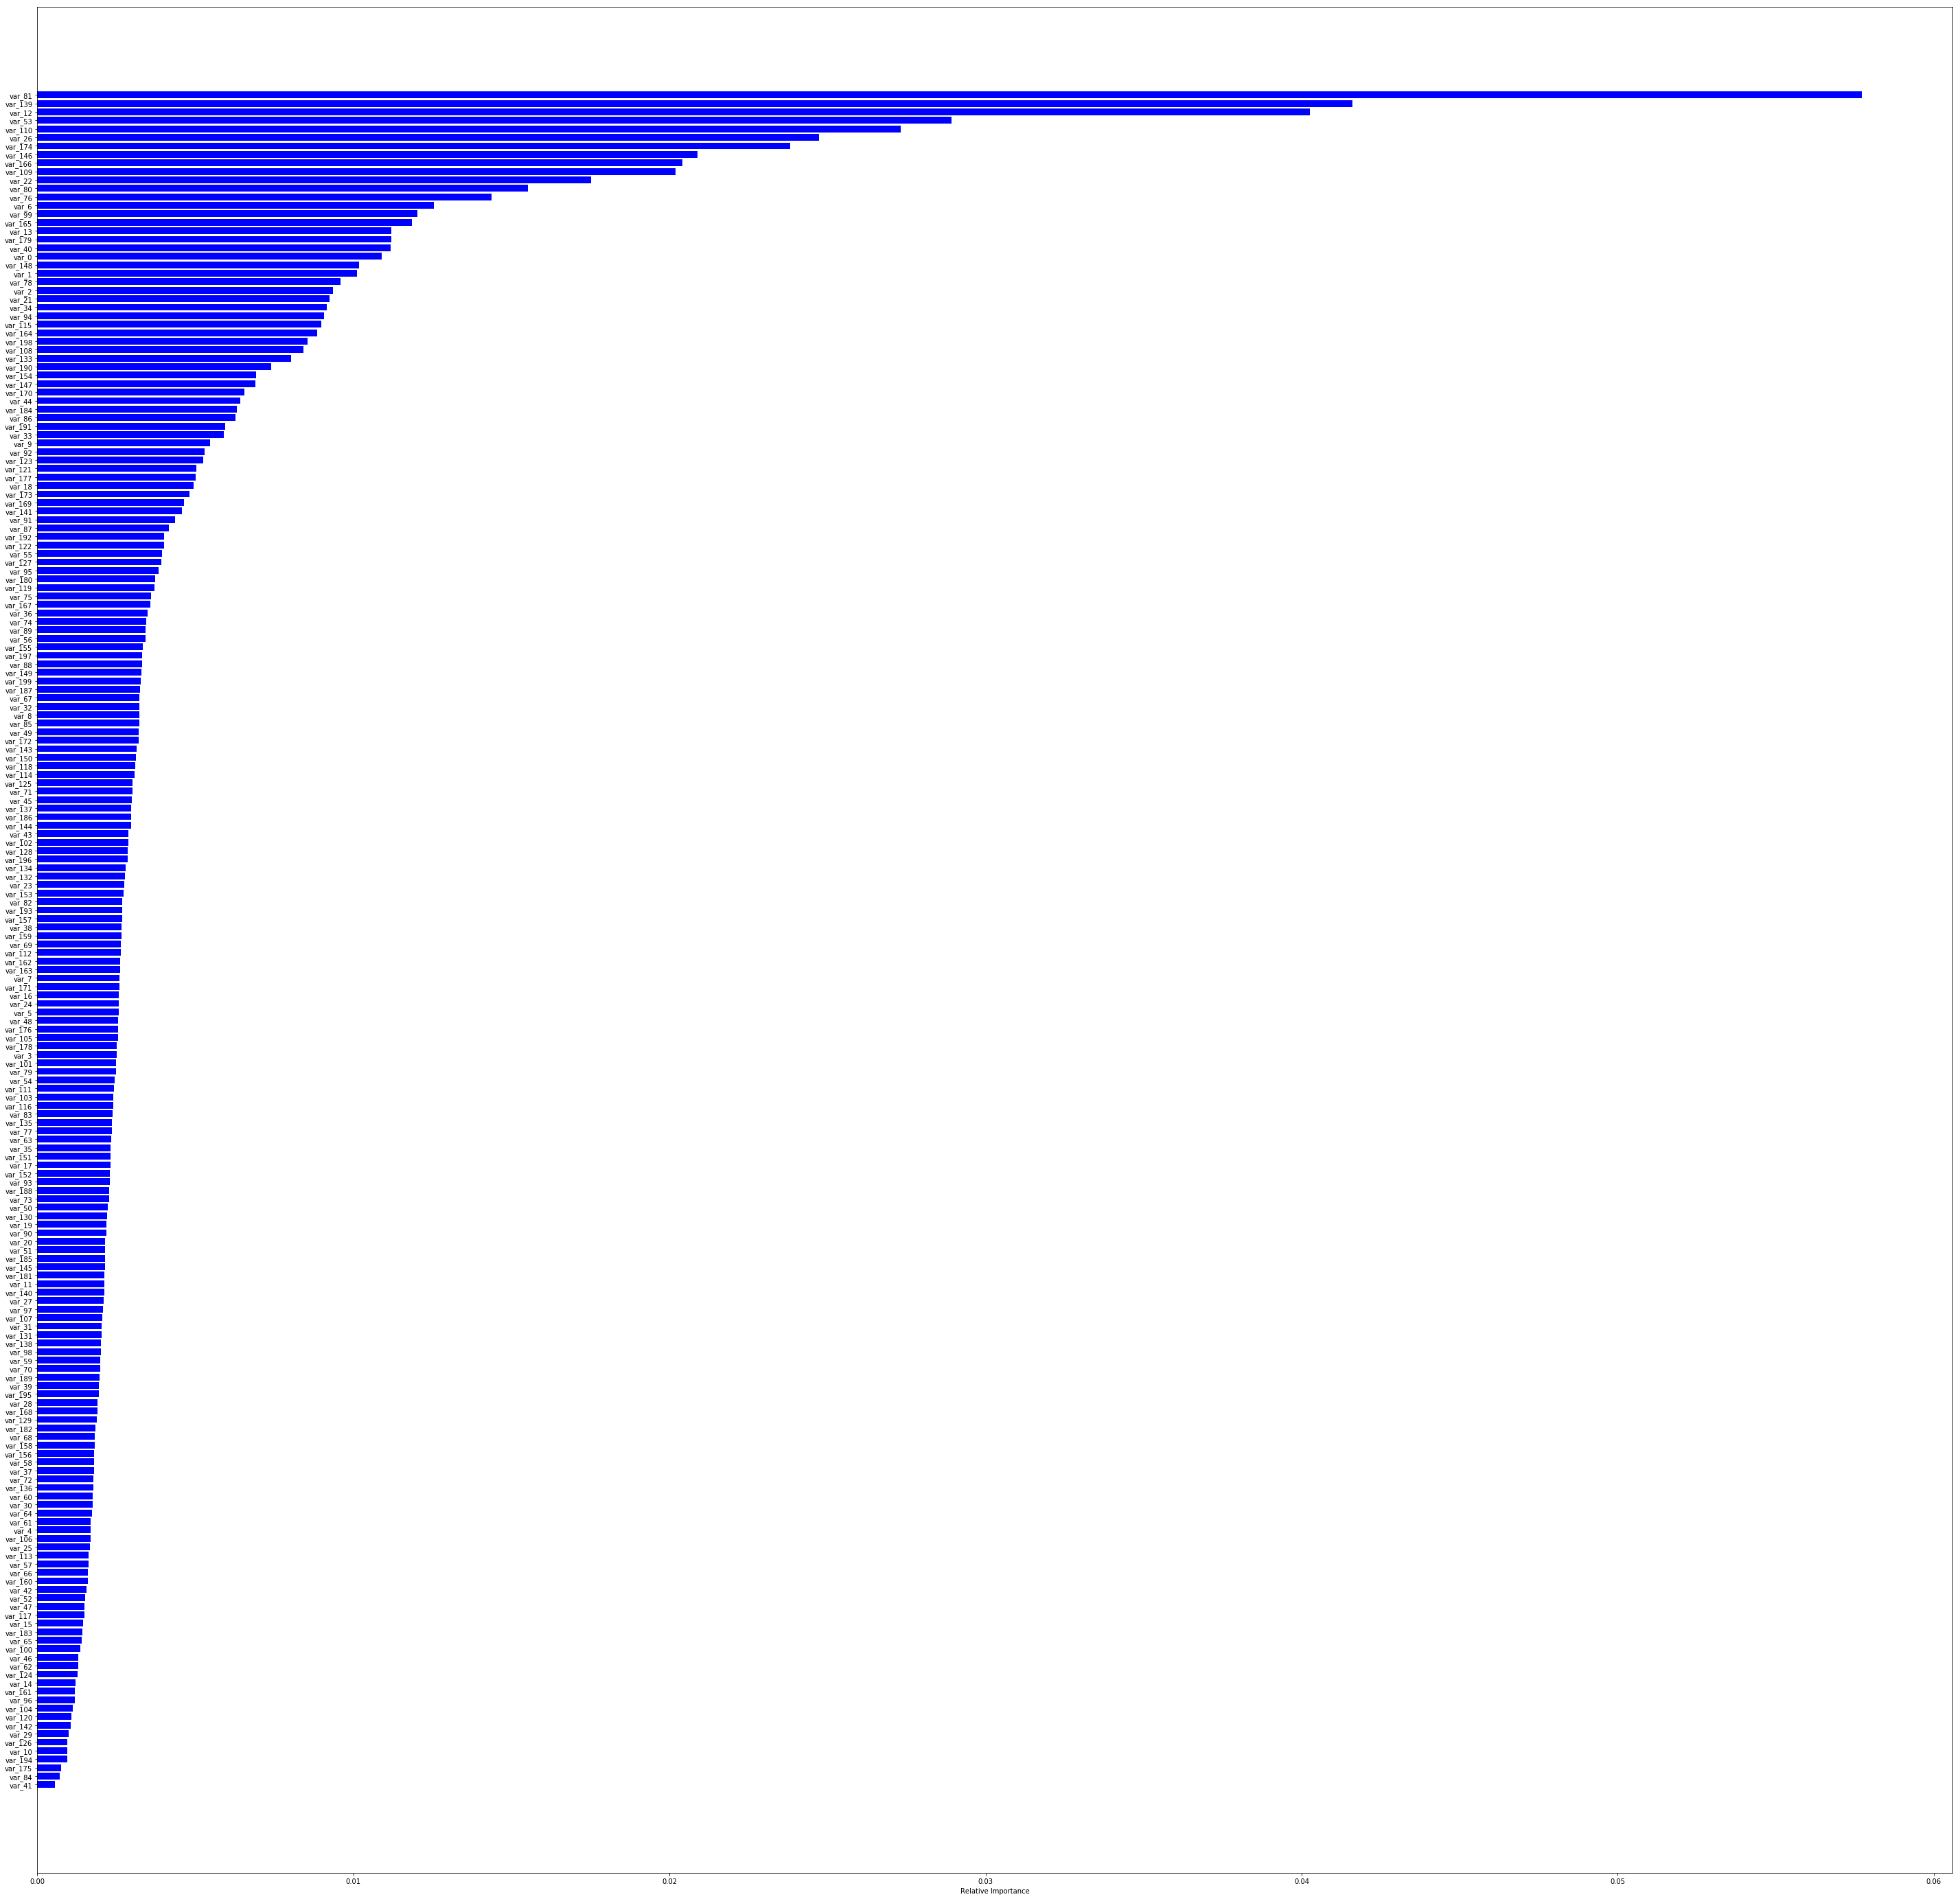

In [22]:
features = sc1_train_df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:200])  # to features
plt.figure(figsize=(50,50))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
sc2_train_df = train_df
sc2_train_df.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [24]:
variable2 = []
#delete data if variance too small 
for each in range(0, len(var)):
    if var[each] > 10:
        #threshold 10
         variable2.append(nvtrain[each + 1])

In [25]:
variable2

['var_1',
 'var_5',
 'var_7',
 'var_8',
 'var_10',
 'var_11',
 'var_13',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_24',
 'var_26',
 'var_30',
 'var_33',
 'var_35',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_44',
 'var_45',
 'var_47',
 'var_48',
 'var_49',
 'var_51',
 'var_52',
 'var_54',
 'var_55',
 'var_56',
 'var_58',
 'var_60',
 'var_61',
 'var_65',
 'var_67',
 'var_69',
 'var_70',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_80',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_89',
 'var_90',
 'var_92',
 'var_96',
 'var_97',
 'var_100',
 'var_101',
 'var_102',
 'var_107',
 'var_109',
 'var_110',
 'var_113',
 'var_117',
 'var_118',
 'var_119',
 'var_120',
 'var_122',
 'var_123',
 'var_128',
 'var_129',
 'var_134',
 'var_135',
 'var_136',
 'var_137',
 'var_138',
 'var_139',
 'var_140',
 'var_141',
 'var_142',
 'var_145',
 'var_147',
 'var_149',
 'var_151',
 'var_154',
 'var_155',
 'var_157',
 'var_158',
 'va

In [26]:
 sc2_train_df = sc2_train_df[variable2]

In [27]:
sc2_train_df

,var_1,var_5,var_7,var_8,var_10,var_11,var_13,var_17,var_18,var_19,...,var_183,var_184,var_185,var_186,var_187,var_188,var_190,var_193,var_196,var_199
0,-6.7863,-9.2834,18.6266,-4.9200,2.9252,3.1821,0.5745,-7.2393,4.2840,30.7133,...,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,4.4354,1.6910,7.8784,-1.0914
1,-4.1473,7.0433,16.5338,3.1468,-0.4032,8.0585,8.4135,-15.5849,7.8000,28.5708,...,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,7.6421,10.9516,8.1267,1.9518
2,-2.7457,-9.0837,14.6155,-4.9193,-0.3249,-11.2648,7.3124,-1.7395,4.7011,20.4775,...,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,2.9057,1.6858,-6.5213,0.3965
3,-2.1518,-1.8361,14.9250,-5.8609,2.3061,2.8102,11.9704,-0.4299,15.9426,13.7257,...,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,4.4666,1.4214,-2.9275,-8.9996
4,-1.4834,2.4486,19.2514,6.2654,-9.4458,-12.1419,7.8895,-3.0680,6.5263,11.3152,...,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-1.4905,9.1942,3.9267,-8.8104
5,-2.3182,3.5609,15.2255,3.5855,0.8010,-0.6192,1.2589,-1.4710,6.7341,14.8241,...,6.4056,21.0550,-13.6509,4.7691,-8.9114,15.1007,-6.3068,0.4403,-3.6241,-4.7602
6,-0.0832,-8.0198,12.0771,-4.3781,-5.1288,-7.5271,13.3058,11.0922,21.1976,6.2946,...,3.3593,11.9140,-4.2870,7.5015,-29.9763,17.2867,8.7830,0.1777,9.1104,-3.2097
7,-7.9881,0.8310,22.3262,5.0647,1.4532,-6.7033,10.9699,-0.7226,5.1548,17.1535,...,6.9724,24.0369,-4.8220,8.4947,-5.9076,18.8663,13.1700,5.8061,4.2178,3.4806
8,2.4426,6.1630,10.1854,-3.1882,0.9501,1.7982,-3.0572,-8.9472,3.8349,0.8560,...,2.0696,-1.7937,-0.0030,11.5024,-18.3172,13.1403,1.4298,1.4181,-1.0733,4.8453
9,1.9743,-16.2859,16.8410,0.1287,0.8787,3.0537,0.8071,1.5367,5.4649,13.6196,...,10.3382,19.0645,-7.6785,6.7580,-21.6070,20.8112,0.5543,3.6885,14.1287,14.2514


In [28]:
model02 = RandomForestRegressor(random_state=1, max_depth=10)
sc2_train_df=pd.get_dummies(sc2_train_df)
model02.fit(sc2_train_df,train_df.target)

C:\Users\TimeUser\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

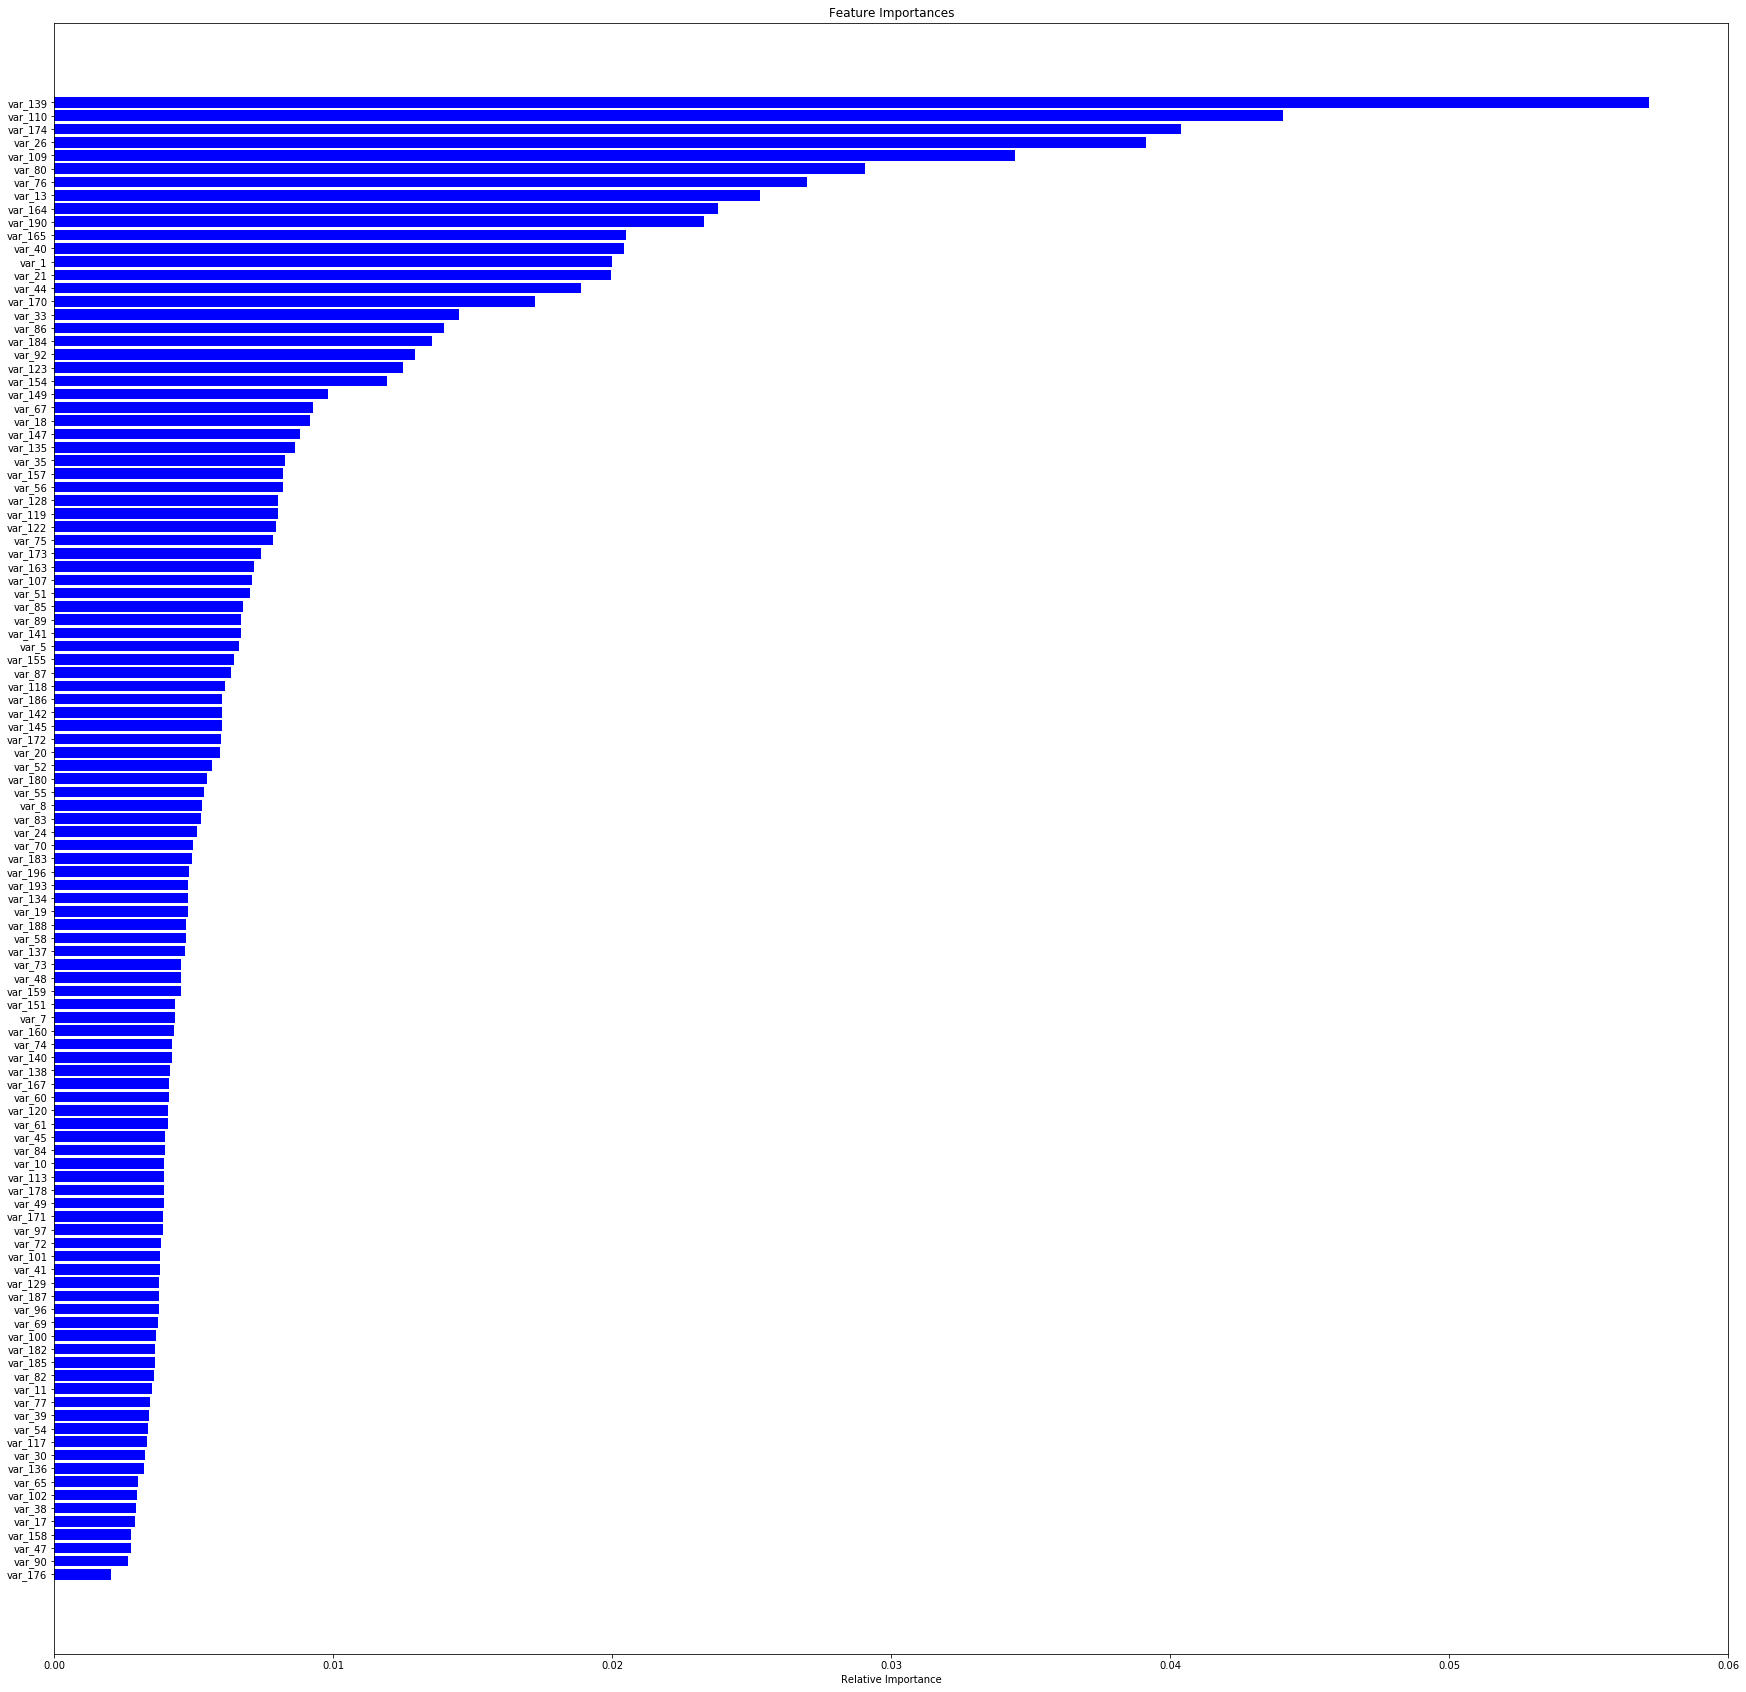

In [29]:
features02 = sc2_train_df.columns
importances02 = model02.feature_importances_
indices02 = np.argsort(importances02[0:112])  # to features
plt.figure(figsize=(30,30))
plt.title('Feature Importances')
plt.barh(range(len(indices02)), importances02[indices02], color='b', align='center')
plt.yticks(range(len(indices02)), [features02[i] for i in indices02])
plt.xlabel('Relative Importance')
plt.show()

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(sc2_train_df.values)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

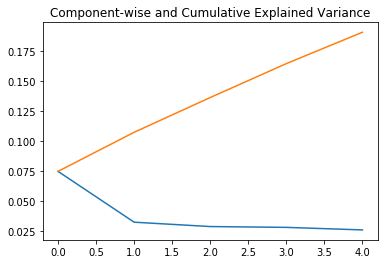

In [32]:
plt.plot(range(5), pca.explained_variance_ratio_)
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
## seems not so good :(... did i exp?std

In [33]:
data_I_care = ['target', 'var_139', 'var_110' , 'var_81', 'var_12' , 'var_174', 'var_26', 'var_109', 'var_80', 'var_53', 'var_76']
data_I_care_nt = ['var_139', 'var_110' , 'var_81', 'var_12' , 'var_174', 'var_26', 'var_109', 'var_80', 'var_53', 'var_76']

In [34]:
# sigoid funcation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
# to break down the training data to 3 part?? target, random
sc3_train_df = train_df
sc3_train_df = sc3_train_df[data_I_care]
sc3_train_df.head()

,target,var_139,var_110,var_81,var_12,var_174,var_26,var_109,var_80,var_53,var_76
0,0,15.6599,2.0323,13.8372,14.0137,18.5618,-5.1488,24.3627,13.6468,5.1736,-2.3440
1,0,16.1622,6.6203,18.1782,14.0239,30.2645,-11.7684,13.0858,2.5462,6.6885,3.2709
2,0,8.6674,3.2304,15.7811,14.1929,25.6820,-7.9940,20.3882,7.4729,6.4059,4.5048
3,0,8.9821,4.2827,10.5404,13.8463,14.7483,0.8135,14.4135,0.7839,5.2091,11.6875
4,0,13.9547,-0.1937,13.3317,13.8481,18.4685,3.1736,28.2749,2.9598,5.7555,1.0273


In [36]:
sc3_train_df.shape

(200000, 11)

In [37]:
#spilt train data in 3 set 
first_train = sc3_train_df[:100000] 
second_train = sc3_train_df[100000:150000] 
third_train = sc3_train_df[150000:]

In [38]:
first_train.shape

(100000, 11)

In [39]:
second_train.shape

(50000, 11)

In [40]:
third_train.shape

(50000, 11)

In [41]:
#spilt data by target 
train_df_0 = sc3_train_df[sc3_train_df['target'] == 0]
train_df_1 = sc3_train_df[sc3_train_df['target'] == 1]

In [42]:
train_df_0.head()

,target,var_139,var_110,var_81,var_12,var_174,var_26,var_109,var_80,var_53,var_76
0,0,15.6599,2.0323,13.8372,14.0137,18.5618,-5.1488,24.3627,13.6468,5.1736,-2.3440
1,0,16.1622,6.6203,18.1782,14.0239,30.2645,-11.7684,13.0858,2.5462,6.6885,3.2709
2,0,8.6674,3.2304,15.7811,14.1929,25.6820,-7.9940,20.3882,7.4729,6.4059,4.5048
3,0,8.9821,4.2827,10.5404,13.8463,14.7483,0.8135,14.4135,0.7839,5.2091,11.6875
4,0,13.9547,-0.1937,13.3317,13.8481,18.4685,3.1736,28.2749,2.9598,5.7555,1.0273


In [43]:
train_df_1.head()

,target,var_139,var_110,var_81,var_12,var_174,var_26,var_109,var_80,var_53,var_76
13,1,1.4873,7.3345,12.1677,13.7999,15.7383,-12.8761,19.9806,-4.2354,7.7886,18.8226
29,1,0.1610,9.6306,15.2648,14.0957,4.7056,-12.6789,11.8464,-9.1243,5.7645,7.0666
63,1,9.0925,-0.5531,12.7630,14.0503,23.1283,-5.2299,16.5122,-10.1533,6.7524,13.6109
65,1,-8.5526,4.2034,14.5121,13.6021,19.7545,-0.4275,9.1121,-5.9993,5.1543,5.6096
71,1,19.5859,3.3659,17.3238,13.9394,20.4828,-2.8896,15.9737,-6.0641,5.2764,-9.0880


In [44]:
train_df_0.shape

(179902, 11)

In [45]:
train_df_1.shape
#is this data get bias???

(20098, 11)

In [46]:
A = train_df_1[data_I_care_nt].values

In [47]:
A

array([[  1.4873,   7.3345,  12.1677, ...,  -4.2354,   7.7886,  18.8226],
       [  0.161 ,   9.6306,  15.2648, ...,  -9.1243,   5.7645,   7.0666],
       [  9.0925,  -0.5531,  12.763 , ..., -10.1533,   6.7524,  13.6109],
       ...,
       [ -5.5796,  -3.3932,  15.3759, ...,  12.731 ,   5.5975,   5.0648],
       [  2.3405,   6.7827,  16.0686, ...,   2.6936,   6.1186,   3.3495],
       [ -9.051 ,   3.1721,  11.8592, ...,  -2.3319,   6.5313,  10.3803]])

In [48]:
mean = np.sum(A , axis=0)/20098

In [49]:
mean

array([ 6.05660691,  6.24845864, 14.162315  , 13.98446414, 18.89397121,
       -2.94911247, 17.80748435,  4.51325361,  6.1536267 ,  4.5803073 ])

In [50]:
std = np.zeros(shape=(10,10))

In [85]:
t = A[0]
np.array([t]).T

array([[  1.4873],
       [  7.3345],
       [ 12.1677],
       [ 13.7999],
       [ 15.7383],
       [-12.8761],
       [ 19.9806],
       [ -4.2354],
       [  7.7886],
       [ 18.8226]])

In [86]:
t

array([  1.4873,   7.3345,  12.1677,  13.7999,  15.7383, -12.8761,
        19.9806,  -4.2354,   7.7886,  18.8226])

In [51]:
for i in range(len(A)):
        t = A[i] - mean
        std = std + t * np.array([t]).T

In [52]:
std = std / 20098

In [53]:
std

array([[ 6.94127236e+01,  7.90678215e-03, -6.61821456e-02,
         1.24018358e-02, -8.29588858e-02, -5.31718545e-01,
         2.83089583e-01, -3.36479198e-01, -1.82934971e-02,
         1.28343428e-01],
       [ 7.90678215e-03,  1.72304855e+01,  3.13932040e-02,
        -2.95387792e-03,  3.54803128e-01, -2.16450623e-01,
         7.15108922e-03,  1.01218950e-01,  2.89044888e-03,
        -2.94491483e-01],
       [-6.61821456e-02,  3.13932040e-02,  6.63984875e+00,
        -3.24450050e-03,  8.86457801e-02,  8.76280122e-02,
        -4.22077782e-02,  1.23084721e-01, -4.47994292e-04,
        -1.36463762e-02],
       [ 1.24018358e-02, -2.95387792e-03, -3.24450050e-03,
         4.32347519e-02, -3.83141561e-04,  5.56879829e-03,
         8.96866592e-03, -7.24293845e-03,  5.57993401e-04,
        -1.04622530e-02],
       [-8.29588858e-02,  3.54803128e-01,  8.86457801e-02,
        -3.83141561e-04,  5.81076545e+01,  4.00890604e-02,
         1.45262219e-01, -1.25428991e-01,  4.57806605e-02,
        -7.

In [54]:
B = train_df_0[data_I_care_nt].values

In [55]:
B

array([[15.6599,  2.0323, 13.8372, ..., 13.6468,  5.1736, -2.344 ],
       [16.1622,  6.6203, 18.1782, ...,  2.5462,  6.6885,  3.2709],
       [ 8.6674,  3.2304, 15.7811, ...,  7.4729,  6.4059,  4.5048],
       ...,
       [ 1.0527,  3.4797, 16.9399, ..., 11.9537,  6.0771, -4.1948],
       [ 2.2357,  2.9091, 21.4391, ...,  9.6956,  6.2404, 14.4559],
       [ 1.0662,  6.7106, 14.7593, ...,  9.3809,  6.2607,  6.3494]])

In [56]:
mean_0 = np.sum(B , axis=0)/179902

In [57]:
mean_0

array([ 7.95051178,  5.43110181, 14.78121736, 14.02839212, 20.35777437,
       -4.17869392, 18.53067453,  5.93824049,  5.99236346,  6.21515756])

In [58]:
mean

array([ 6.05660691,  6.24845864, 14.162315  , 13.98446414, 18.89397121,
       -2.94911247, 17.80748435,  4.51325361,  6.1536267 ,  4.5803073 ])

In [59]:
std_0 = np.zeros(shape=(10,10))

In [60]:
for i in range(len(B)):
        t = B[i] - mean_0
        std_0 = std_0 + t * np.array([t]).T

In [61]:
std_0 = std_0/ 179902

In [62]:
std_0

array([[ 5.75662849e+01,  5.29417615e-02, -1.25927668e-03,
        -6.96952711e-04,  1.22647435e-01, -2.04768213e-01,
         6.55165049e-02, -3.39020516e-02,  3.44256820e-03,
         4.36235774e-02],
       [ 5.29417615e-02,  1.42581122e+01, -1.24417330e-02,
         1.56909788e-04, -4.75337861e-02, -3.19496127e-02,
        -4.04957106e-02,  1.66105956e-01, -7.85260462e-03,
         8.64436997e-02],
       [-1.25927668e-03, -1.24417330e-02,  5.09846517e+00,
         7.14958107e-04,  7.21901220e-02,  2.72936845e-02,
        -1.30966155e-02,  2.01605372e-02, -3.68843435e-03,
        -1.06417196e-02],
       [-6.96952711e-04,  1.56909788e-04,  7.14958107e-04,
         3.51338453e-02, -5.44310591e-04, -3.16404630e-03,
         6.88440518e-04,  3.60303715e-03, -1.07829950e-04,
         2.31588754e-03],
       [ 1.22647435e-01, -4.75337861e-02,  7.21901220e-02,
        -5.44310591e-04,  4.99109601e+01, -6.76479522e-02,
         6.05642292e-02, -2.82372102e-01, -7.20067963e-03,
         2.

In [63]:
std_f = np.zeros(shape=(10,10))

In [64]:
std_f = (179902/200000) * std_0 + (20098/200000) * std

In [65]:
std_f 

array([[ 5.87567335e+01,  4.84161965e-02, -7.78337577e-03,
         6.19344547e-04,  1.01986056e-01, -2.37623451e-01,
         8.73804235e-02, -6.43080290e-02,  1.25831099e-03,
         5.21370752e-02],
       [ 4.84161965e-02,  1.45568060e+01, -8.03676018e-03,
        -1.55693269e-04, -7.10294963e-03, -5.04901192e-02,
        -3.57076836e-02,  1.59585461e-01, -6.77303518e-03,
         4.81635232e-02],
       [-7.78337577e-03, -8.03676018e-03,  5.25335880e+00,
         3.17072112e-04,  7.38437511e-02,  3.33566811e-02,
        -1.60219962e-02,  3.05033885e-02, -3.36280253e-03,
        -1.09436575e-02],
       [ 6.19344547e-04, -1.55693269e-04,  3.17072112e-04,
         3.59479054e-02, -5.28114715e-04, -2.28648275e-03,
         1.52052037e-03,  2.51312506e-03, -4.09213619e-05,
         1.03181220e-03],
       [ 1.01986056e-01, -7.10294963e-03,  7.38437511e-02,
        -5.28114715e-04,  5.07346459e+01, -5.68214598e-02,
         6.90755302e-02, -2.66600889e-01, -1.87658476e-03,
         1.

In [66]:
std

array([[ 6.94127236e+01,  7.90678215e-03, -6.61821456e-02,
         1.24018358e-02, -8.29588858e-02, -5.31718545e-01,
         2.83089583e-01, -3.36479198e-01, -1.82934971e-02,
         1.28343428e-01],
       [ 7.90678215e-03,  1.72304855e+01,  3.13932040e-02,
        -2.95387792e-03,  3.54803128e-01, -2.16450623e-01,
         7.15108922e-03,  1.01218950e-01,  2.89044888e-03,
        -2.94491483e-01],
       [-6.61821456e-02,  3.13932040e-02,  6.63984875e+00,
        -3.24450050e-03,  8.86457801e-02,  8.76280122e-02,
        -4.22077782e-02,  1.23084721e-01, -4.47994292e-04,
        -1.36463762e-02],
       [ 1.24018358e-02, -2.95387792e-03, -3.24450050e-03,
         4.32347519e-02, -3.83141561e-04,  5.56879829e-03,
         8.96866592e-03, -7.24293845e-03,  5.57993401e-04,
        -1.04622530e-02],
       [-8.29588858e-02,  3.54803128e-01,  8.86457801e-02,
        -3.83141561e-04,  5.81076545e+01,  4.00890604e-02,
         1.45262219e-01, -1.25428991e-01,  4.57806605e-02,
        -7.

In [67]:
std_0

array([[ 5.75662849e+01,  5.29417615e-02, -1.25927668e-03,
        -6.96952711e-04,  1.22647435e-01, -2.04768213e-01,
         6.55165049e-02, -3.39020516e-02,  3.44256820e-03,
         4.36235774e-02],
       [ 5.29417615e-02,  1.42581122e+01, -1.24417330e-02,
         1.56909788e-04, -4.75337861e-02, -3.19496127e-02,
        -4.04957106e-02,  1.66105956e-01, -7.85260462e-03,
         8.64436997e-02],
       [-1.25927668e-03, -1.24417330e-02,  5.09846517e+00,
         7.14958107e-04,  7.21901220e-02,  2.72936845e-02,
        -1.30966155e-02,  2.01605372e-02, -3.68843435e-03,
        -1.06417196e-02],
       [-6.96952711e-04,  1.56909788e-04,  7.14958107e-04,
         3.51338453e-02, -5.44310591e-04, -3.16404630e-03,
         6.88440518e-04,  3.60303715e-03, -1.07829950e-04,
         2.31588754e-03],
       [ 1.22647435e-01, -4.75337861e-02,  7.21901220e-02,
        -5.44310591e-04,  4.99109601e+01, -6.76479522e-02,
         6.05642292e-02, -2.82372102e-01, -7.20067963e-03,
         2.

In [110]:

#now I have mean, mean_0, std_f, ready to plug them in nomal distrubtion and to test 
def gussian_distribution_1(x): # x is a vectot
    y = multivariate_normal.pdf(x, mean= mean, cov=std_f);
    return y

def gussian_distribution_0(x): # x is a vectot
    y = multivariate_normal.pdf(x, mean= mean_0, cov=std_f);
    return y




In [79]:
sc_test = test_df

In [80]:
def final_output(x):
    y = (gussian_distribution_1(x) * (20098/200000)) / ((gussian_distribution_1(x) * (20098/200000)) + (gussian_distribution_0(x) * (179902/200000)))
    return y 

In [70]:
T = sc_test[data_I_care_nt].values

In [71]:
T

array([[-2.5502,  3.7662, 16.906 , ...,  9.4883,  7.3213,  7.3075],
       [ 6.753 ,  1.7375, 14.0406, ...,  1.9772,  6.8481,  6.9388],
       [-6.0452,  8.6896, 14.3299, ..., 16.1691,  5.651 , -9.7077],
       ...,
       [16.5629,  0.2553, 15.288 , ..., 12.0411,  6.2427, -4.1993],
       [ 7.2125, 10.8259,  9.1805, ...,  2.3608,  4.9431, 15.5314],
       [-1.6528,  3.3216, 11.3898, ...,  8.011 ,  6.0381, -0.6072]])

In [74]:
T[0]

array([-2.5502,  3.7662, 16.906 , 13.9696, 18.1317, -9.4902, 15.0763,
        9.4883,  7.3213,  7.3075])

In [117]:
final_output(T[99])  # this suppose to be the percentage

0.03245601435272235

In [87]:
from scipy.stats import multivariate_normal

In [111]:

gussian_distribution_1(T[0])

2.1009296604563008e-11

In [118]:
output = []
for i in range(len(T)):
    output.append(final_output(T[i]))

In [119]:
output

[0.10823571433262635,
 0.11752421960178869,
 0.13097351017987807,
 0.06715497080129308,
 0.08457392461768846,
 0.059723431009009426,
 0.153985318475683,
 0.11227925851011566,
 0.0878906720159022,
 0.04051458360578295,
 0.07158121232482108,
 0.12838955058237028,
 0.23623932218625887,
 0.05416735244266288,
 0.14643027918276286,
 0.08990084852935042,
 0.1455023747591344,
 0.1506648469745195,
 0.17699914841440606,
 0.07681771866188794,
 0.3691692512087261,
 0.07237639241384031,
 0.08100061257533907,
 0.18700791718818188,
 0.13398661937786835,
 0.04099191112199291,
 0.058606011419918246,
 0.05775527081404423,
 0.15770880718881788,
 0.06702227642274187,
 0.11779607035166781,
 0.03864154965604379,
 0.1207691180163061,
 0.03566927044554268,
 0.07412716831234871,
 0.025015108772670755,
 0.07534587912203956,
 0.09938559912518502,
 0.16503691614947535,
 0.09184624651984917,
 0.08951729071170604,
 0.057637393113426215,
 0.05061735579650158,
 0.041357785355064784,
 0.03676237887372279,
 0.089680633

In [120]:
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = output
sub_df.to_csv("my_first_submission.csv", index=False)

In [121]:
sub_df

,ID_code,target
0,test_0,0.108236
1,test_1,0.117524
2,test_2,0.130974
3,test_3,0.067155
4,test_4,0.084574
5,test_5,0.059723
6,test_6,0.153985
7,test_7,0.112279
8,test_8,0.087891
9,test_9,0.040515


In [ ]:
##done the trash makde first time !!! 